# FINAL REPORT

# Problem statement: 

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price.


# 1.	Summary of problem statement, data and findings

>> The proposed project is about determining the ‘price’ of a house based on all the features of the available dataset and not only on the location and square footage. The problem statement also clearly states that the value of the house is not being predicted only from the buyer perspective but also from the seller perspective with the given dataset to decide on the correct ‘price’ to be tagged for the house. To have a clear understanding of the given dataset we started our work by analyzing it in excel workbook using filter which gave some interesting insights on the given dataset,

* The room_bed attribute had a value 33, which when compared with the total area, indicates this value could be an outlier.
* The room_bath(no of bathrooms/no of bedrooms) attribute has some integer non zero value when the room_bed has ‘0’ value, which indicates wrong values in the data set.
* The attribute lot_measure15 is only a part of the total area, but in few cases the value is greater than total_area which is not possible.
* The attribute ceil (Total floors (levels) in the house) has few values in decimals. How can the total floors be in decimals
* The attribute year_renovated has few values ‘0’ but the lot_measure15 has greater value than lot_measure in few cases. This indicates that few values of ‘0’ might be missing values in year_innovated.
* The correlation between attributes is not clear from excel workbook, which can be seen using python notebook.

* With this inference it made us easy to start our analysis for the given dataset.

* Note: Since we have one target variable – ‘price’ and all other attributes are independent variables, we will be training our model based on the independent variables. So this problem lies under Supervised learning method.


# Summary of the Approach to EDA and Pre-processing

# UNIVARIATE ANALYSIS

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from scipy.stats import zscore

In [37]:
inn_df = pd.read_csv("innercity.csv")  

In [3]:
inn_df

cid         dayhours    price  room_bed  room_bath  \
0      3034200666  20141107T000000   808100         4       3.25   
1      8731981640  20141204T000000   277500         4       2.50   
2      5104530220  20150420T000000   404000         3       2.50   
3      6145600285  20140529T000000   300000         2       1.00   
4      8924100111  20150424T000000   699000         2       1.50   
5      5525400430  20140715T000000   585000         3       2.50   
6      2419600075  20141201T000000   465000         3       1.75   
7       114101161  20140829T000000   480000         3       1.50   
8      7011201550  20140707T000000   780000         4       2.00   
9      7203000640  20140918T000000   215000         4       1.00   
10     7518503685  20141009T000000   402000         2       1.00   
11     7300400150  20141027T000000   299000         4       2.50   
12     2215800050  20150415T000000   785000         4       2.50   
13     7443000480  20150507T000000   865000         4       2.00   
14     5072100095  20141117T000000   554000         5       2.50   
15     1387301730  20150202T000000   361000         3       1.50   
16     1310430130  20141009T000000   459000         4       2.75   
17     3352400351  20141121T000000   200000         3       1.00   
18     3678900110  20140610T000000   403000         2       1.00   
19     2474400250  20140630T000000   327500         3       2.25   
20     8820900029  20140610T000000   700000         5       2.75   
21      263000050  20141031T000000   730000         3       2.50   
22     9406500350  20141229T000000   207000         2       1.50   
23     9533100145  20150205T000000   750000         3       1.00   
24     5694500105  20141204T000000   595000         2       2.00   
25     3291800710  20141120T000000   338000         4       3.00   
26     9126100815  20141217T000000   500000         3       2.00   
27     3416600800  20150209T000000   834000         4       2.50   
28     7855000460  20141007T000000  1450000         3       2.75   
29     6204410330  20141020T000000   432000         4       1.75   
...           ...              ...      ...       ...        ...   
21583  1074100110  20140525T000000   355300         3       2.50   
21584  1626079066  20140806T000000   290000         2       1.00   
21585  2738600140  20140502T000000   499950         4       2.50   
21586  4068300280  20140708T000000   255000         3       1.75   
21587  1862400057  20150304T000000   320000         2       1.00   
21588  9352901085  20150204T000000   256000         3       1.00   
21589  8856940060  20150227T000000   374950         4       2.75   
21590  1526079026  20140813T000000   487500         5       3.50   
21591  1604600227  20150328T000000   441000         2       1.00   
21592  7203150330  20140717T000000   669000         4       2.50   
21593  8820903555  20150105T000000   467500         3       1.00   
21594   579000595  20140906T000000   724000         2       1.00   
21595  2734100835  20150303T000000    90000         1       1.00   
21596  2698200210  20140908T000000   274000         3       1.75   
21597  7821200375  20150126T000000   432000         2       1.00   
21598  3904100089  20140801T000000   190000         3       1.75   
21599  2589300065  20140916T000000   329900         3       1.75   
21600  1446400715  20150422T000000   280000         2       1.00   
21601  6752600130  20150413T000000   351000         4       2.50   
21602  9433000480  20140922T000000   799950         4       3.50   
21603  7974700112  20140714T000000   650000         4       2.50   
21604  2115720130  20140821T000000   289950         3       2.50   
21605  1727500340  20140614T000000   397500         3       2.00   
21606  1517900100  20141021T000000   499000         4       2.50   
21607  7942601435  20150324T000000   835000         6       2.00   
21608  5137800030  20140701T000000   300000         4       2.50   
21609  8562890910  20140619T000000   320000         4       2.50   
21

In [4]:
inn_df.describe()

cid         price      room_bed     room_bath  living_measure  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000    21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757     2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163      918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000      290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000     1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000     1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000     2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000    13540.000000   

        lot_measure          ceil         coast         sight     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

           ...           basement      yr_built  yr_renovated       zipcode  \
count      ...       21613.000000  21613.000000  21613.000000  21613.000000   
mean       ...         291.509045   1971.005136     84.402258  98077.939805   
std        ...         442.575043     29.373411    401.679240     53.505026   
min        ...           0.000000   1900.000000      0.000000  98001.000000   
25%        ...           0.000000   1951.000000      0.000000  98033.000000   
50%        ...           0.000000   1975.000000      0.000000  98065.000000   
75%        ...         560.000000   1997.000000      0.000000  98118.000000   
max        ...        4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  living_measure15  lot_measure15  \
count  21613.000000  21613.000000      21613.000000   21613.000000   
mean      47.560053   -122.213896       1986.552492   12768.455652   
std        0.138564      0.140828        685.391304   27304.179631   
min       47.155900   -122.519000        399.000000     651.000000   
25%       47.471000   -122.328000       1490.000000    5100.000000   
50%       47.571800   -122.230000       1840.000000    7620.000000   
75%       47.678000   -122.125000       2360.000000   10083.000000   
max       47.777600   -121.315000       6210.000000  871200.000000   

          furnished    total_area  
count  21613.000000  2.161300e+04  
mean       0.196687  1.718687e+04  
std        0.397503  4.158908e+04  
min        0.000000  1.423000e+03  
25%        0.000000  7.035000e+03  
50%        0.000000  9.575000e+03  
75%        0.000000  1.300000e+04  
max        1.000000  1.652659e+06  

[8 rows x 22 columns]

In [5]:
inn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

* From the dataset we can clearly see that the attributes have data types of int, float and object.
* The attribute dayhours is of the type object, which shows the date of the house sold. 

* Before starting the univariate analysis we can remove the cid column and dayhours which is not going have any effect on the the target column, (i;e predicting the price of the house).

In [3]:
inn_df = inn_df.drop(['cid'], axis=1)

In [4]:
inn_df = inn_df.drop(['dayhours'], axis=1)

# Univariate Analysis

The univariate analysis can be started by using different basic plots.

In [5]:
inn_df1=inn_df
from scipy.stats import zscore
inn_df1 =inn_df.apply(zscore)
inn_df1.head()

price  room_bed  room_bath  living_measure  lot_measure      ceil  \
0  0.729318  0.676485   1.474063        1.023606    -0.039835 -0.915427   
1 -0.715066  0.676485   0.500221        0.511858    -0.183656 -0.915427   
2 -0.370711 -0.398737   0.500221        0.315869    -0.260335  0.936506   
3 -0.653817 -1.473959  -1.447464       -1.371813    -0.271924 -0.915427   
4  0.432329 -1.473959  -0.798235       -0.740293    -0.266950 -0.915427   

      coast     sight  condition   quality     ...      basement  yr_built  \
0 -0.087173 -0.305759   2.444294  1.142667     ...     -0.658681 -0.510853   
1 -0.087173 -0.305759  -0.629187  0.291916     ...      1.148964  0.170051   
2 -0.087173 -0.305759  -0.629187  0.291916     ...     -0.658681  1.191407   
3 -0.087173 -0.305759   0.907554 -1.409587     ...     -0.658681 -1.872660   
4 -0.087173 -0.305759   0.907554  0.291916     ...     -0.658681 -0.578943   

   yr_renovated   zipcode       lat      long  living_measure15  \
0     -0.210128  1.029090  1.135587 -0.867059          0.194707   
1     -0.210128 -1.026840 -1.757734 -1.222109          0.398975   
2     -0.210128 -0.746486 -1.505137  1.525981          0.559471   
3     -0.210128  1.029090  1.045374 -0.959372         -0.680725   
4     -0.210128  0.692665  0.842574 -0.391291         -0.126285   

   lot_measure15  furnished  total_area  
0      -0.191018   2.020944   -0.017069  
1      -0.145346  -0.494818   -0.171608  
2      -0.308402  -0.494818   -0.252304  
3      -0.326861  -0.494818   -0.301116  
4      -0.250094  -0.494818   -0.282217  

[5 rows x 21 columns]

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


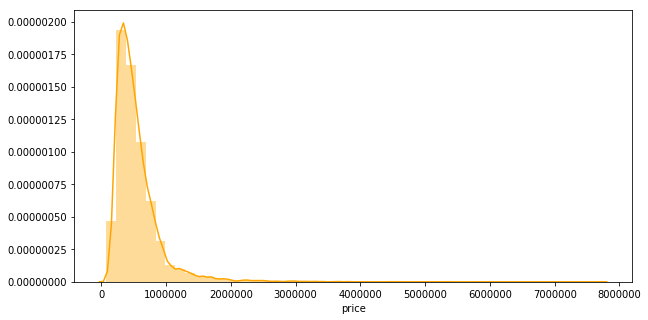

In [9]:
plt.figure(figsize=(10, 5))
sns.distplot(inn_df['price'], color='orange')

*The above target column is skewed towards right, because of outliers.

*To check whether it is normally distributed or not let us use skewness and kurtosis test.

In [10]:
from scipy.stats import skew
from scipy.stats import kurtosis
skew(inn_df['price'])

4.021436449851422

In [11]:
kurtosis(inn_df['price'])

34.514180829647714

* From both these values it is very clear that the price column is skewed and is not normally distributed

pdf= [8.80072179e-01 9.91070189e-02 1.48984408e-02 4.16416046e-03
 1.20297969e-03 1.85073798e-04 1.85073798e-04 4.62684495e-05
 4.62684495e-05 9.25368991e-05]
bin_edges= [  75000.  837500. 1600000. 2362500. 3125000. 3887500. 4650000. 5412500.
 6175000. 6937500. 7700000.]
cdf= [0.88007218 0.9791792  0.99407764 0.9982418  0.99944478 0.99962985
 0.99981493 0.99986119 0.99990746 1.        ]


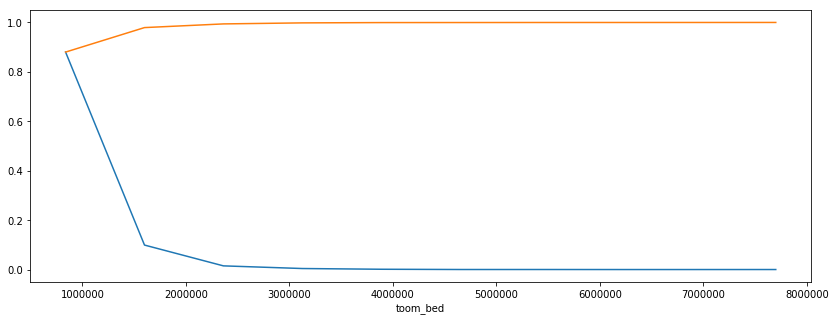

In [12]:
plt.figure(figsize=(14, 5))
counts, bin_edges = np.histogram(inn_df['price'], bins=10, density=True)
plt.xlabel('toom_bed')
pdf= counts/(sum(counts))
print("pdf=", pdf);
print("bin_edges=", bin_edges);
cdf = np.cumsum(pdf)
print("cdf=", cdf);
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);

*The orange plot shows the cdf,From the plot it is very clear that around 90% of the houses have a cumulative price range around 10,00,000. So the probability of house to be bought will be in and around 10,00,000.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


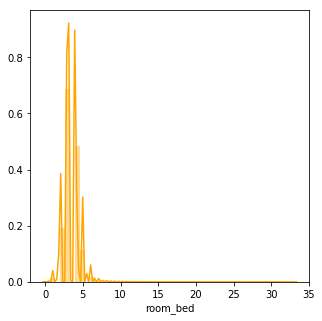

In [13]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['room_bed'], color='orange')

*From the plot we can see a lot of cluters with uneven peaks, which suggest the distribution not normal. This may be due to outliers or missing value in the data.

*When the data is analyzed using filter in excel we were able to see some zeros, but when it was related with other features we see that those zeros might be missing values.

*Apart from that we can see an outlier, which when related with other features semms to be an error value.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


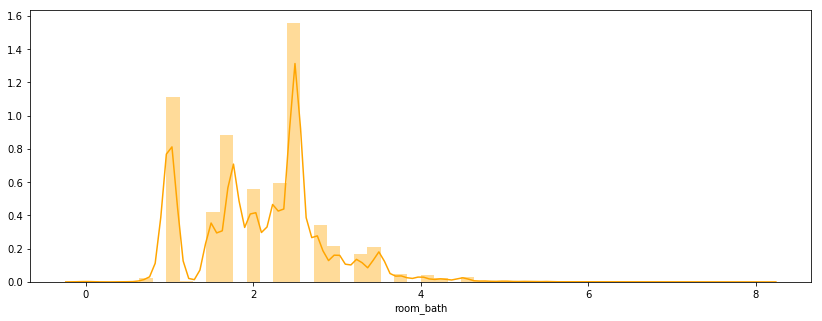

In [14]:
plt.figure(figsize=(14, 5))
sns.distplot(inn_df['room_bath'], color='orange')

*room_bath denotes (Number of bathrooms/bedrooms) so it depends on the no of bedrooms. Few cases the no of bathrooms are said to be zero but the room_bed has got some integer value which is not possible. So zero denotes missing value, which is mentioned above

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


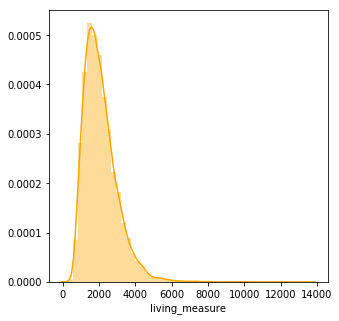

In [15]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['living_measure'], color='orange')

*Living measure denotes the total area constructed. The distance plot is also skewed toward right.

In [16]:
skew(inn_df['living_measure'])

1.4714532949510906

In [17]:
kurtosis(inn_df['living_measure'])

5.241602521613769

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


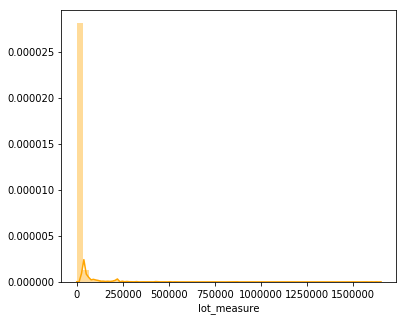

In [18]:
plt.figure(figsize=(6, 5))
sns.distplot(inn_df['lot_measure'], color='orange')

*lot_measure is square footage of the lot, which is completely right skewed.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


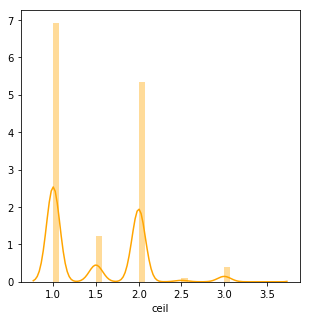

In [19]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['ceil'], color='orange')

ceil: Denotes total floor in the house. we can clearly see most of the houses has 1 and 2 floors. But few houses have 1.5,2.5 and 3.5 floors, which is confusing. Is the data wrong or few houses has half floor constructed. But how can the no of levels or floors be considered half? 

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


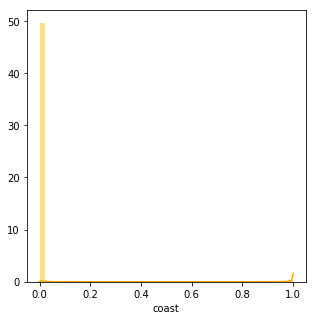

In [20]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['coast'], color='orange')

*There are only few houses near the coast.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


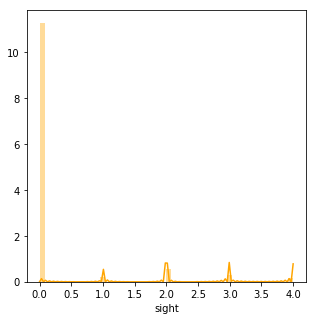

In [21]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['sight'], color='orange')

*From this it is very clear that most number of houses are not visited and maximum time a house was visted was 4.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


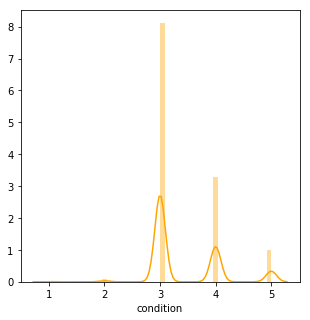

In [22]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['condition'], color='orange')

*condition: How good the condition is (Overall). Based on this every house is rated on a scale of 5.    
*It is very clear that most of the house has a rating of 3 and few houses has 4 and 5. But very few houses are rated low.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


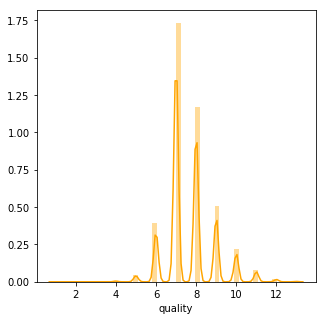

In [23]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['quality'], color='orange')

*quality: grade given to the housing unit, based on grading system(1-13) being 13 a better housing unit. Most housing units have the quality with a maximum grade of 7.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


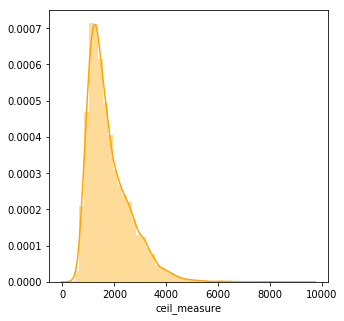

In [24]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['ceil_measure'], color='orange')

*ceil_measure: square footage of house apart from basement: It has slight right skewed distribution.

In [25]:
skew(inn_df['ceil_measure'])

1.4465640690628738

In [26]:
kurtosis(inn_df['ceil_measure'])

3.4012389779605696

As kurtosis is greater than 2 then the distribution is not said to be linear

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


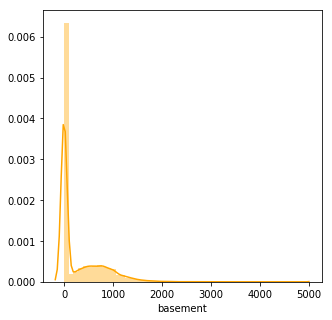

In [27]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['basement'], color='orange')

*basement_measure: square footage of the basement. The range varies from (0-4820)sqft. From the plot it seems to be most houses has less basement area.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


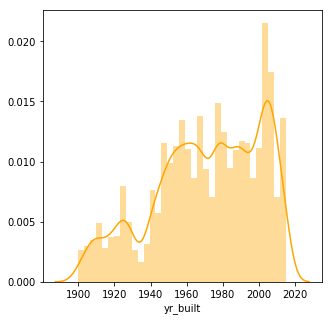

In [28]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['yr_built'], color='orange')

yr_built: Built Year

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


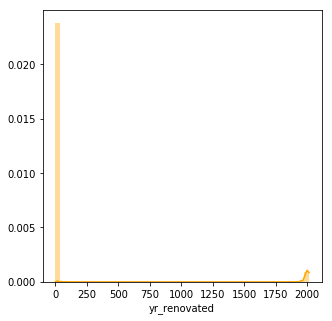

In [29]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['yr_renovated'], color='orange')

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


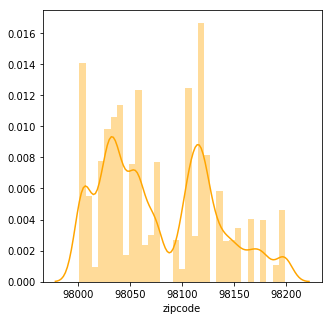

In [30]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['zipcode'], color='orange')

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


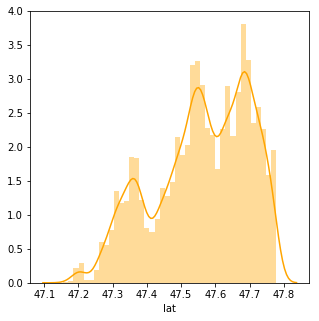

In [31]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['lat'], color='orange')

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


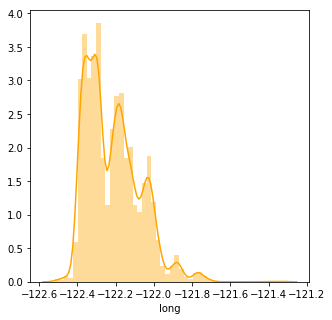

In [32]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['long'], color='orange')

*longitue, latitude and pincode columns when analyzed doesnot have a big impact on the target column 'price'

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


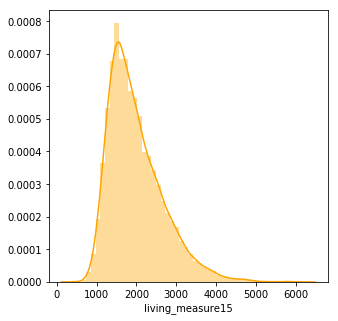

In [33]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['living_measure15'], color='orange')

living_measure: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.
Here we can see the normal distribution of the plot.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


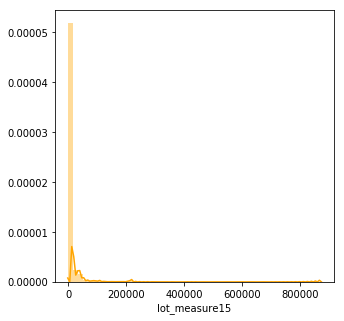

In [34]:
plt.figure(figsize=(5, 5))
sns.distplot(inn_df['lot_measure15'], color='orange')

lot_measure15: lotSize area in 2015(implies-- some renovations)

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


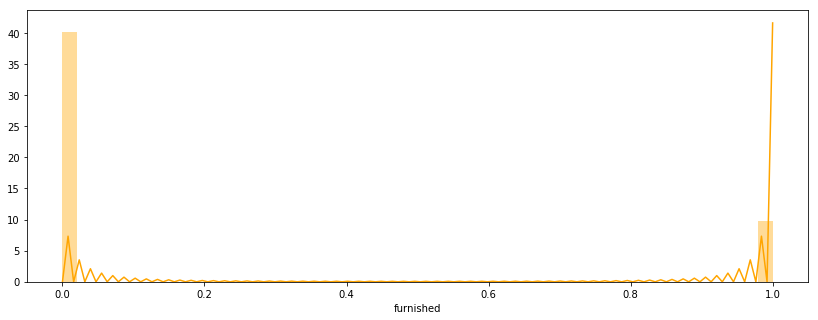

In [35]:
plt.figure(figsize=(14, 5))
sns.distplot(inn_df['furnished'], color='orange')

furnished: It is a catagoraical variable, it says whether the house is furnised or not with '0' and '1'.
'0': Not furnished
'1': Furnished
Here we see many houses not being furnished compared to the furnished ones.

C:\Users\Gowtham\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


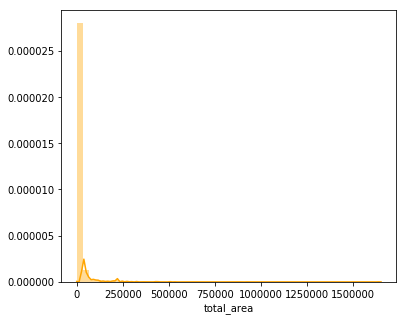

In [36]:
plt.figure(figsize=(6, 5))
sns.distplot(inn_df['total_area'], color='orange')

Comparing lot_measure and total_area, we see same distribution in case of historam.

From all the graph PDF represents the distribution curve, similar to histograms.

# From the distance plot we can see that more than 10 attributes are categorical. Among those attributes many are having non-gaussian type distribution. The other attributes which are not categorical are mostly right skewed. So as most of the attributes are having non-gaussian type distribution they possess outliers. The outliers can be visually seen using boxplot.

# Boxplot

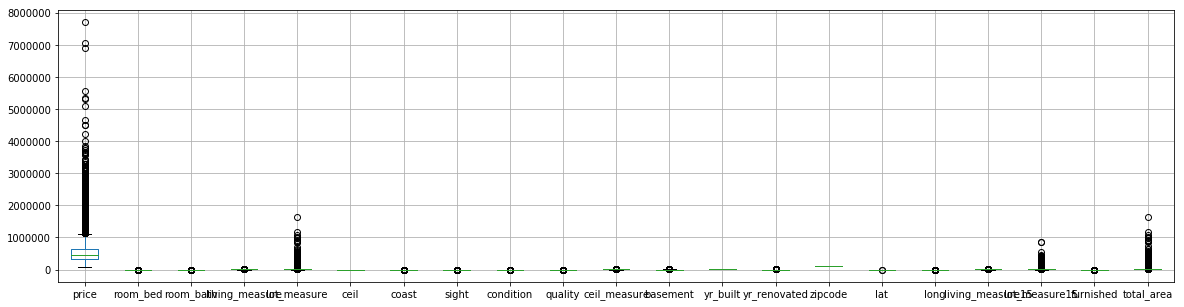

In [37]:
inn_df.boxplot(figsize = (20,5))

# Normalized values will give clear picture about the outliers in the boxplot

In [38]:
inn_df1=inn_df
from scipy.stats import zscore
inn_df1 =inn_df.apply(zscore)
inn_df1.head()

price  room_bed  room_bath  living_measure  lot_measure      ceil  \
0  0.729318  0.676485   1.474063        1.023606    -0.039835 -0.915427   
1 -0.715066  0.676485   0.500221        0.511858    -0.183656 -0.915427   
2 -0.370711 -0.398737   0.500221        0.315869    -0.260335  0.936506   
3 -0.653817 -1.473959  -1.447464       -1.371813    -0.271924 -0.915427   
4  0.432329 -1.473959  -0.798235       -0.740293    -0.266950 -0.915427   

      coast     sight  condition   quality     ...      basement  yr_built  \
0 -0.087173 -0.305759   2.444294  1.142667     ...     -0.658681 -0.510853   
1 -0.087173 -0.305759  -0.629187  0.291916     ...      1.148964  0.170051   
2 -0.087173 -0.305759  -0.629187  0.291916     ...     -0.658681  1.191407   
3 -0.087173 -0.305759   0.907554 -1.409587     ...     -0.658681 -1.872660   
4 -0.087173 -0.305759   0.907554  0.291916     ...     -0.658681 -0.578943   

   yr_renovated   zipcode       lat      long  living_measure15  \
0     -0.210128  1.029090  1.135587 -0.867059          0.194707   
1     -0.210128 -1.026840 -1.757734 -1.222109          0.398975   
2     -0.210128 -0.746486 -1.505137  1.525981          0.559471   
3     -0.210128  1.029090  1.045374 -0.959372         -0.680725   
4     -0.210128  0.692665  0.842574 -0.391291         -0.126285   

   lot_measure15  furnished  total_area  
0      -0.191018   2.020944   -0.017069  
1      -0.145346  -0.494818   -0.171608  
2      -0.308402  -0.494818   -0.252304  
3      -0.326861  -0.494818   -0.301116  
4      -0.250094  -0.494818   -0.282217  

[5 rows x 21 columns]

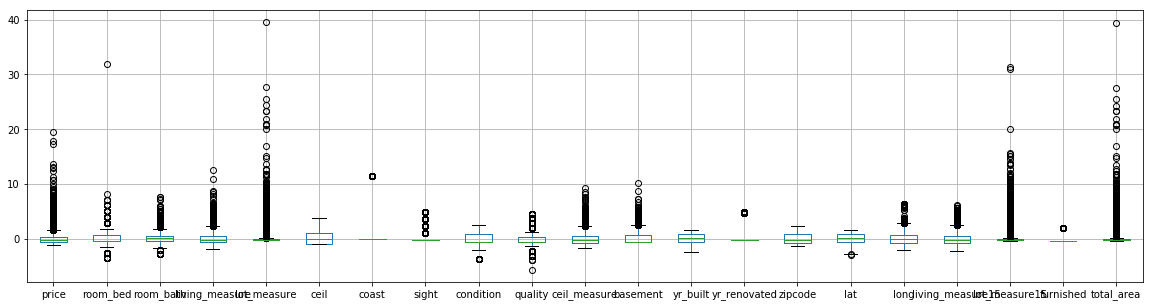

In [39]:
inn_df1.boxplot(figsize = (20,5))

* From the boxplot we can clearly see that except few attributes like ceil, yr_built & zipcode all the other attributes having outliers.
* For better analysis of dataset the outliers have to be removed, this can done only when the no of outliers for each attribute is found.


In [40]:
Q1 = inn_df.quantile(0.25)
Q3 = inn_df.quantile(0.75)

In [41]:
IQR = Q3 - Q1

In [42]:
((inn_df < (Q1 - 1.5 * IQR)) | (inn_df > (Q3 + 1.5 * IQR))).sum()

price               1159
room_bed             546
room_bath            571
living_measure       572
lot_measure         2425
ceil                   0
coast                163
sight               2124
condition             30
quality             1911
ceil_measure         611
basement             496
yr_built               0
yr_renovated         914
zipcode                0
lat                    2
long                 256
living_measure15     544
lot_measure15       2194
furnished           4251
total_area          2419
dtype: int64

* This clearly gives us information on which attributes have more outliers.

# BIVARIATE ANALYSIS

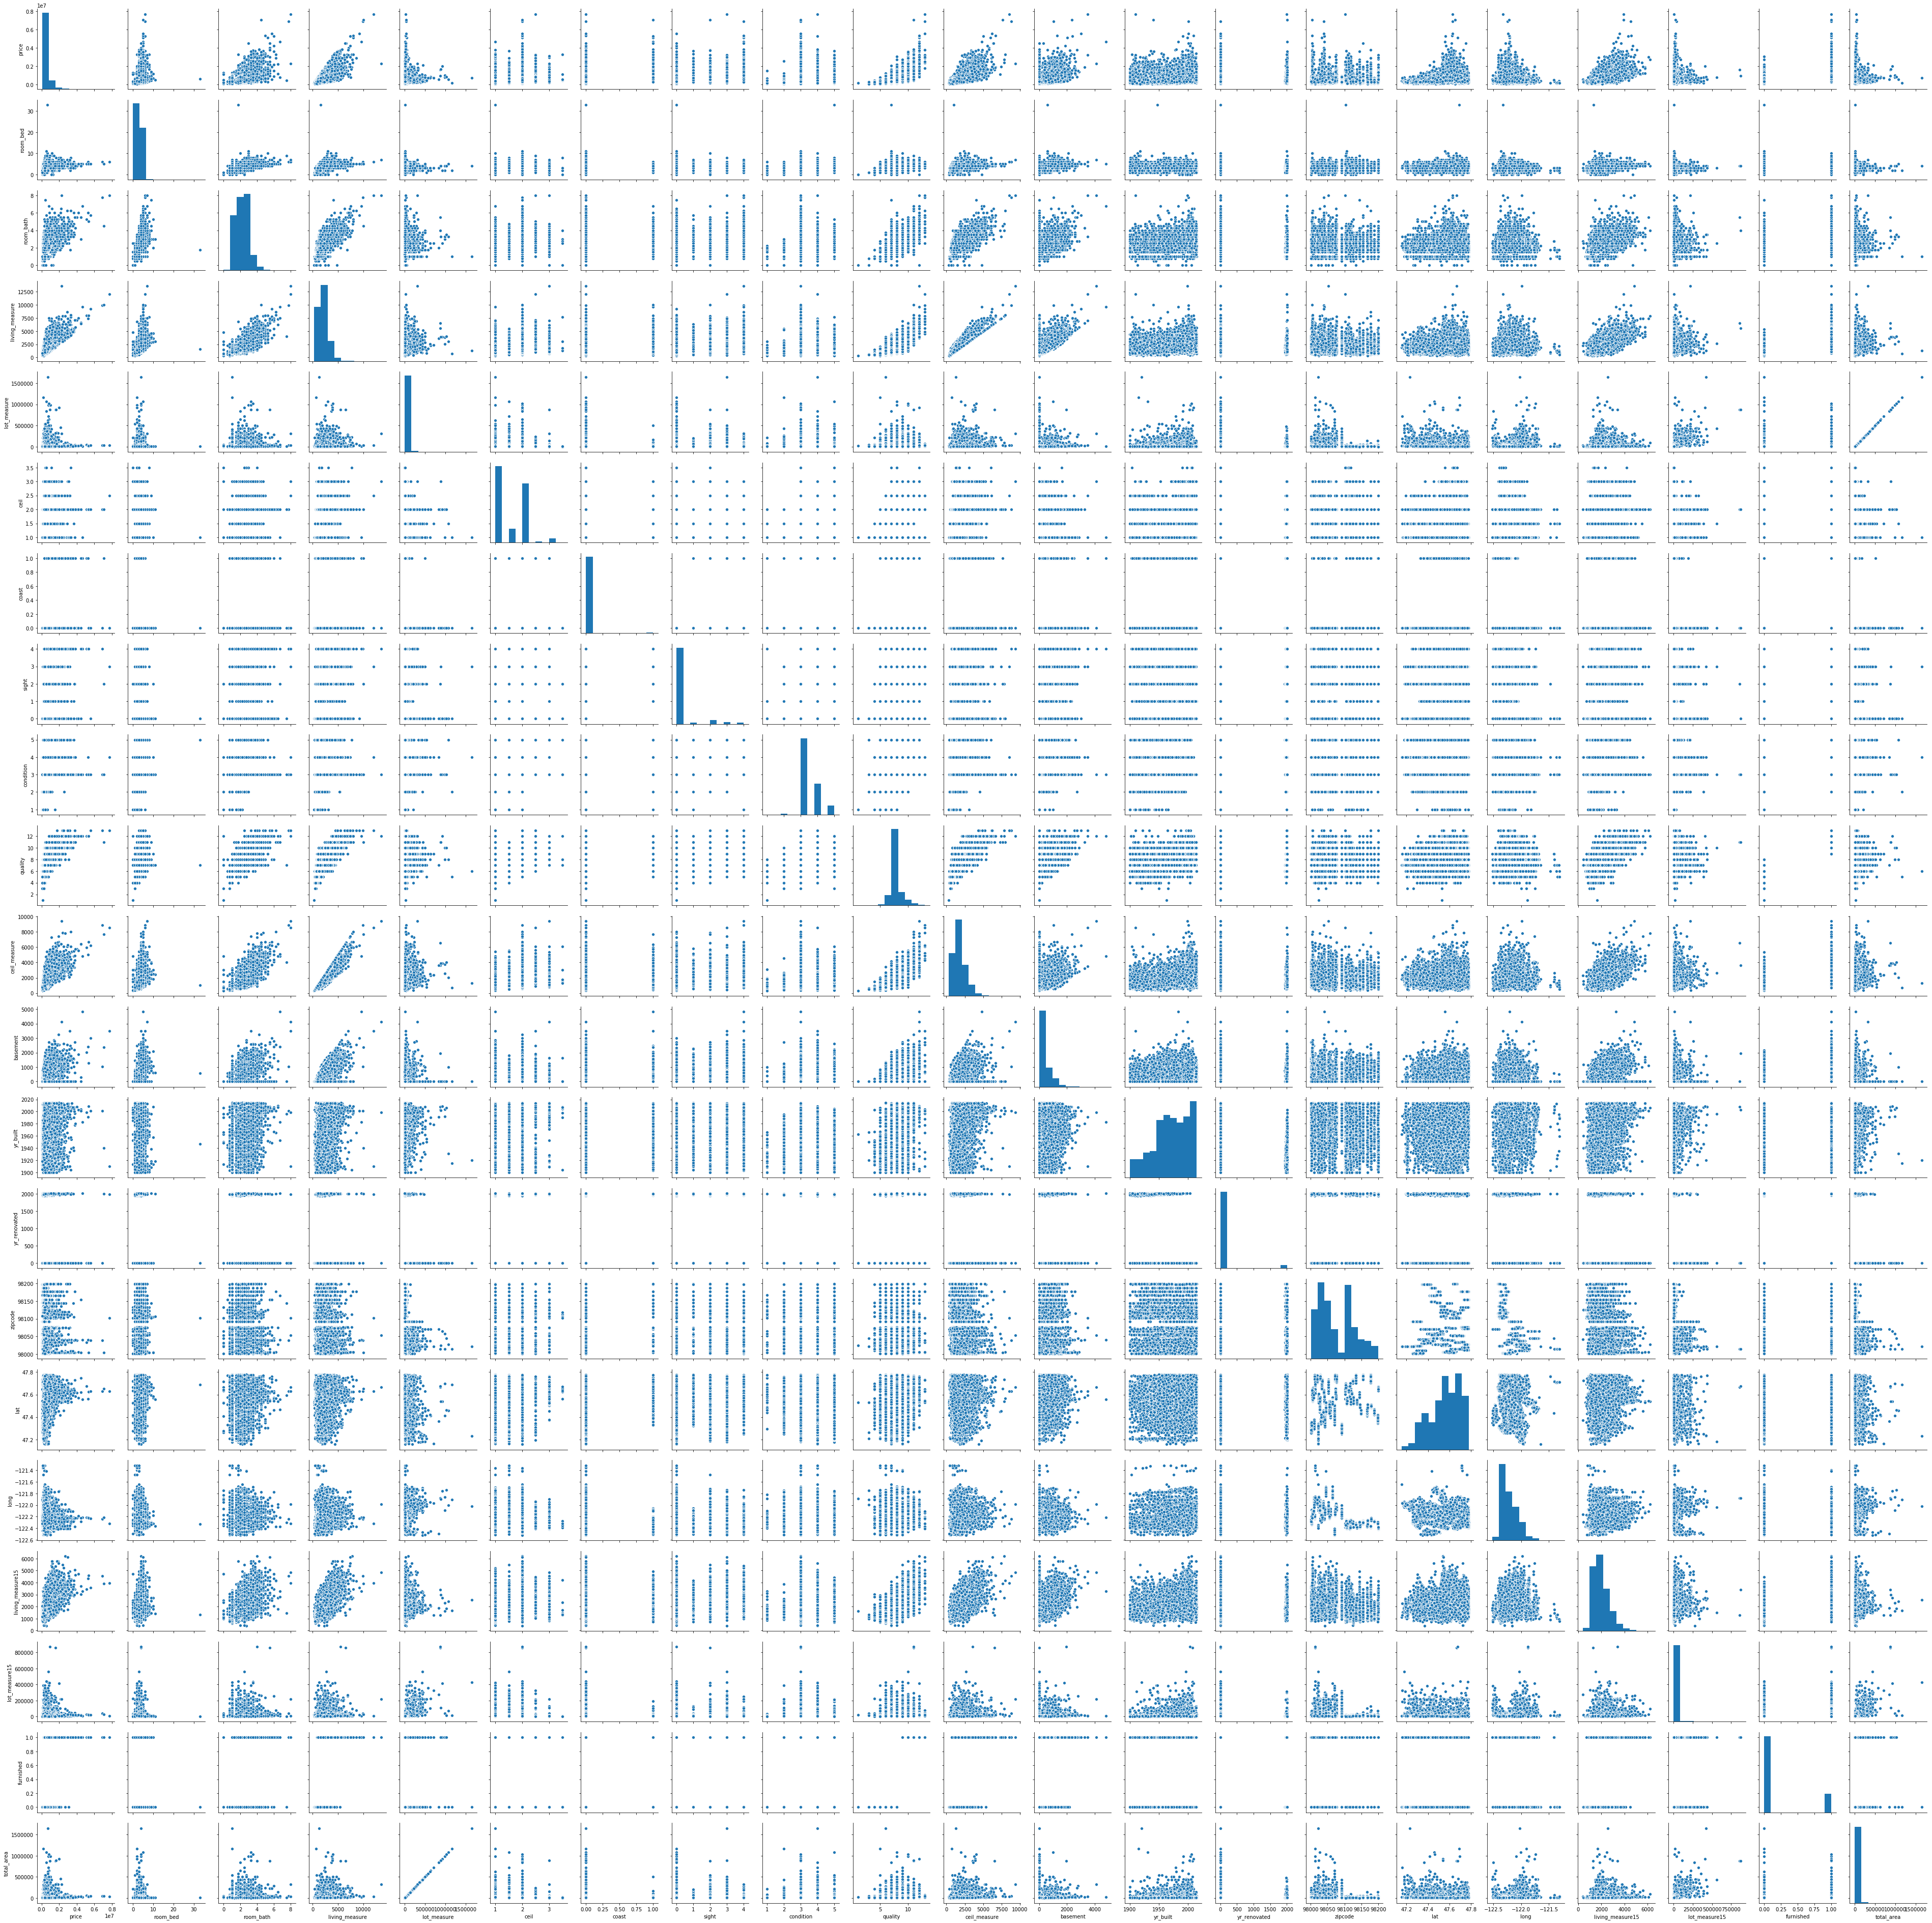

In [43]:
sns.pairplot(inn_df)

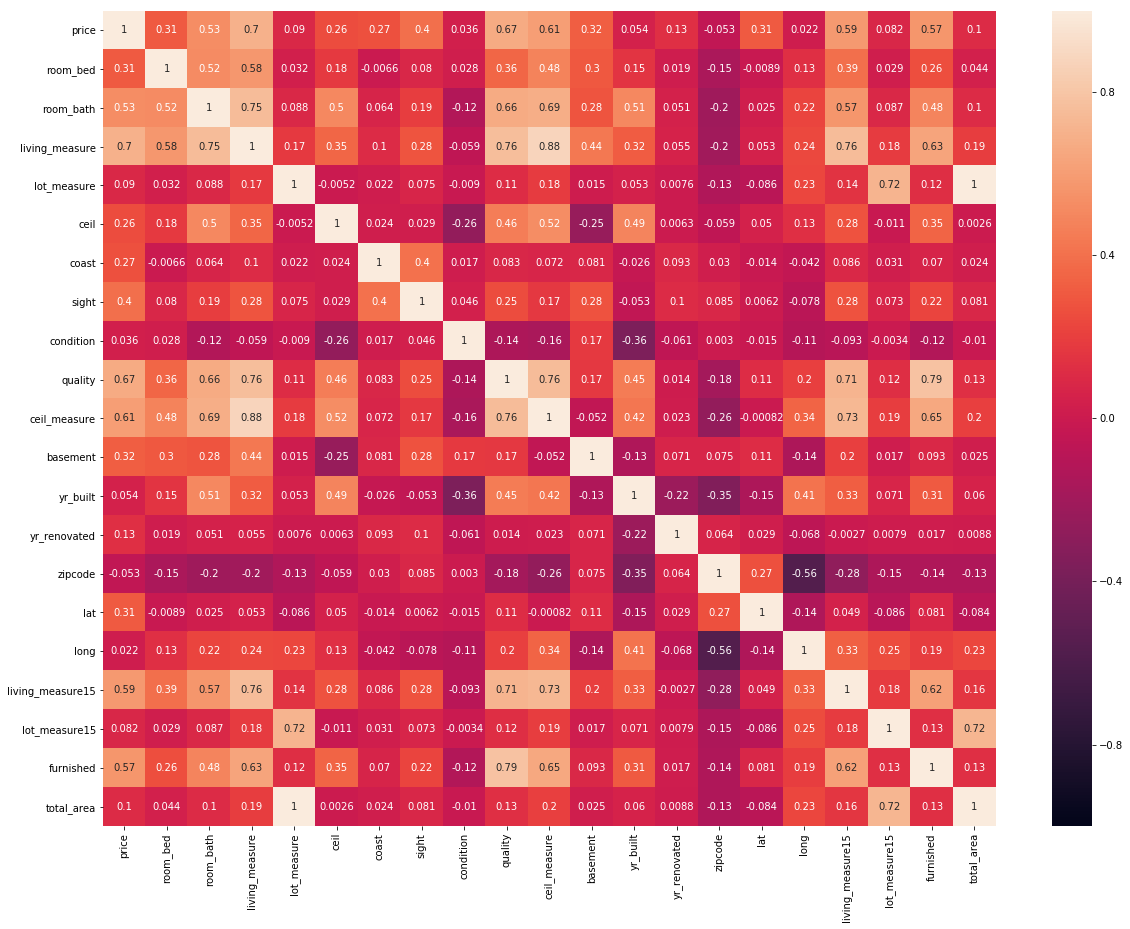

In [44]:
correlation = inn_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation,annot=True, linewidth=0, vmin=-1)

* From the heat map it is very clear that total_area and lot_measure has a correlation of '1' so any one column can be neglected.
* living_measure & ceil_measure has a correlation of '.88' which means all the houses are almost built with a ceiling.
* living_measure has also got a good relationship with quality & room_bath, which means with greater living capacity the quality is good and the no of bathrrooms/bedrooms increases
* living_measure15 is just an extension of living_measure, so has good correlation
* All the frunished houses have better quallity

* living_measure, quality, ceil_measure, furnished & roon_bath have better correlation with the tatget variable ('price'). So for predicting the price of a property these attributes play a major role in this dataset

# 3. Deciding Models and Model Building

In [38]:
y = inn_df.iloc[:,0]

In [39]:
inn = inn_df.iloc[:,1:]

In [40]:
from sklearn import model_selection
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(inn, y, test_size=test_size, random_state=seed)

In [125]:
#Testing using Simple linear model 

In [126]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-3.42965531e+04,  4.44280247e+04,  8.02199084e+01, -4.00647941e+01,
        6.85480021e+03,  4.96172063e+05,  5.43116427e+04,  2.91887065e+04,
        8.45032653e+04,  5.78472992e+01,  2.23726095e+01, -2.58062506e+03,
        2.21119213e+01, -5.90281160e+02,  6.16900000e+05, -2.12248589e+05,
        2.01079557e+01, -3.71107304e-01,  4.48608648e+04,  4.01551124e+01])

In [127]:
regression_model.intercept_

7081869.056403663

In [128]:
regression_model.score(X_train, y_train)

0.6993391229680337

In [129]:
regression_model.score(X_test, y_test)

0.7014013348373487

* With the existing dataset the model can get a score of 70% with the test data

In [ ]:
# Testing using Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import utils
from sklearn import preprocessing

In [56]:
lab_enc = preprocessing.LabelEncoder()
y_train1 = lab_enc.fit_transform(y_train)

In [57]:
lm = LogisticRegression()
lm.fit(X_train, y_train1)
y_predict = lm.predict(X_test)
coef_df = pd.DataFrame(lm.coef_)
coef_df['intercept'] = lm.intercept_

In [58]:
lab_enc1 = preprocessing.LabelEncoder()
y_test1 = lab_enc1.fit_transform(y_test)

In [59]:
lm_score1 = lm.score(X_train, y_train1)
print(lm_score1)

0.032123735871505056


In [60]:
lm_score = lm.score(X_test, y_test1)
print(lm_score)

0.00015422578655151142


* Model score obtained was <1%

In [14]:
# Let us now test the data using a bit more complex model
# Testing using SVR

In [15]:
from sklearn import svm
from sklearn.svm import SVR

In [81]:
model = svm.SVR(kernel='rbf', C=1, gamma=0.3)

In [82]:
model.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.3,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [83]:
model.score(X_test, y_test)

-0.06155229516242989

In [84]:
model.score(X_train, y_train)

-0.05971354158476893

* Model score obtained was <1%

In [16]:
# Testing using Ridge & Lasso method

In [130]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [131]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-3.43066348e+04  4.44257778e+04  8.00413819e+01 -4.03387626e+01
  6.88814081e+03  4.94611790e+05  5.43742439e+04  2.91787640e+04
  8.45401407e+04  5.77376616e+01  2.23052819e+01 -2.58200692e+03
  2.21186209e+01 -5.89398004e+02  6.16109129e+05 -2.11821861e+05
  2.00981371e+01 -3.71414138e-01  4.48325421e+04  4.04288621e+01]


In [132]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-3.42964013e+04  4.44271587e+04  2.64923928e+02 -3.05002031e-01
  6.85460560e+03  4.96142059e+05  5.43127257e+04  2.91879288e+04
  8.45046602e+04 -8.70965992e+01 -1.22570597e+02 -2.58065467e+03
  2.21120919e+01 -5.90252406e+02  6.16886632e+05 -2.12230353e+05
  2.01075209e+01 -3.71119789e-01  4.48574988e+04  3.95314371e-01]


C:\Users\Gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [133]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6993389244543258
0.7013657486911482


In [134]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.699339122871955
0.7014006117815433


Model score obtained is 70% for both ridge & lasso methods

In [135]:
# Testing using Decision Tree Regressor

In [136]:
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeRegressor

d1 = DecisionTreeRegressor(max_depth = 10)
d1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [137]:
d1.score(X_train, y_train)

0.916127598460612

In [138]:
d1.score(X_test, y_test)

0.7639751713858369

* Model score obtined is 76%

In [139]:
# Testing using Gradient Boosting Method

In [157]:
from sklearn.ensemble import GradientBoostingRegressor
dt_gb = GradientBoostingRegressor()
dt_gb = dt_gb.fit(X_train, y_train)

In [158]:
test_pred2 = dt_gb.predict(X_test)
dt_gb.score(X_test, y_test)

0.8716108082683545

In [142]:
# Testing using Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
dt_rf = RandomForestRegressor()
dt_rf = dt_rf.fit(X_train, y_train)

In [148]:
test_pred3 = dt_rf.predict(X_test)
dt_rf.score(X_test, y_test)

0.8695394595852415

# From all the model score we were able to find that Random Forest regressor & Gradient Boost Regressor methods have the highest model score of 87% for the existing dataset.

* As we have chosen our model to be used for analyzing our dataset, we can now fine tune our model using different iterations which can increase the model score.

> The different iterations through which we try to improve our model score are,
* Removing the outliers using (mean+3*SD) on the existing dataset and developing a model using GB and RF method.
* Replacing ‘Zeros’ from the attributes which are providing wrong information with their respective column medians and developing a model using GB and RF
* Using PCA to analyse the minimum number of attributes needed for developing a better model using GB or RF which can provide atleast 95% variance.
* Analysing the model performance using GB and RF by removing attributes.
* Using Polynomial function on the existing dataset and test the model score using GB & RF
* Changing the learning rate and the estimators in GB & RF



# Iteration 1
* Removing the outliers using (mean+3*SD) on the existing dataset and developing a model using GB and RF method.

In [58]:
a = np.mean(inn_df, axis=0)
b = np.std(inn_df, axis=0)
d = np.median(inn_df, axis=0)
c = (a+(3*b))

In [59]:
d

array([ 4.50000e+05,  3.00000e+00,  2.25000e+00,  1.91000e+03,
        7.61800e+03,  1.50000e+00,  0.00000e+00,  0.00000e+00,
        3.00000e+00,  7.00000e+00,  1.56000e+03,  0.00000e+00,
        1.97500e+03,  0.00000e+00,  9.80650e+04,  4.75718e+01,
       -1.22230e+02,  1.84000e+03,  7.62000e+03,  0.00000e+00,
        9.57500e+03])

In [98]:
inn_new = np.where(inn_df > c, c, inn_df)

In [99]:
inn_new1 = pd.DataFrame(inn_new)

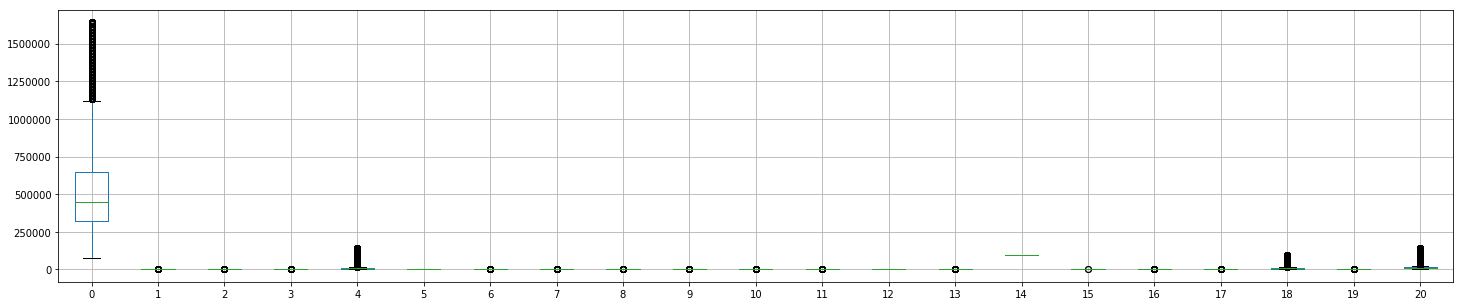

In [100]:
inn_new1.boxplot(figsize = (25,5))

In [101]:
inn_new2 =inn_new1.apply(zscore)
inn_new2.head()

0         1         2         3         4         5         6   \
0  0.933625  0.712536  1.511426  1.094771  0.022413 -0.915976 -0.087173   
1 -0.836516  0.712536  0.516518  0.553969 -0.259460 -0.915976 -0.087173   
2 -0.414498 -0.410405  0.516518  0.346853 -0.409742  0.937603 -0.087173   
3 -0.761454 -1.533346 -1.473297 -1.436643 -0.432455 -0.915976 -0.087173   
4  0.569655 -1.533346 -0.810025 -0.769270 -0.422707 -0.915976 -0.087173   

         7         8         9     ...           11        12        13  \
0 -0.319192  2.444294  1.161933    ...    -0.672881 -0.510853 -0.210135   
1 -0.319192 -0.629187  0.299722    ...     1.197967  0.170051 -0.210135   
2 -0.319192 -0.629187  0.299722    ...    -0.672881  1.191407 -0.210135   
3 -0.319192  0.907554 -1.424698    ...    -0.672881 -1.872660 -0.210135   
4 -0.319192  0.907554  0.299722    ...    -0.672881 -0.578943 -0.210135   

         14        15        16        17        18        19        20  
0  1.029090  1.135587 -0.878686  0.207486 -0.247161  2.020944  0.066446  
1 -1.026840 -1.757734 -1.240516  0.417335 -0.163213 -0.494818 -0.234601  
2 -0.746486 -1.505137  1.560043  0.582216 -0.462923 -0.494818 -0.391799  
3  1.029090  1.045374 -0.972762 -0.691866 -0.496852 -0.494818 -0.486886  
4  0.692665  0.842574 -0.393835 -0.122276 -0.355749 -0.494818 -0.450069  

[5 rows x 21 columns]

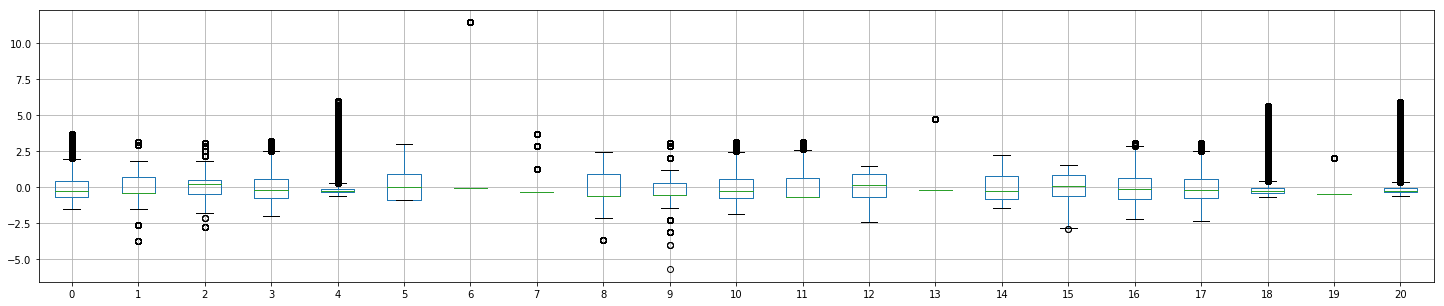

In [102]:
inn_new2.boxplot(figsize = (25,5))

From the plot it is clear that the no of outlier in each attribute has been reduced. But to get a clear view let us find the count of outliers for each attribute

In [81]:
Q1 = inn_new1.quantile(0.25)
Q3 = inn_new1.quantile(0.75)

In [82]:
IQR = Q3 - Q1

In [83]:
((inn_new1 < (Q1 - 1.5 * IQR)) | (inn_new1 > (Q3 + 1.5 * IQR))).sum()

0      870
1      484
2      384
3      406
4     2205
5        0
6        0
7     1295
8       30
9     1808
10     453
11     425
12       0
13       0
14       0
15       2
16      40
17     382
18    1888
19    4251
20    2197
dtype: int64

# Now this cleary says that the no of outliers in each attribute are less compared to the normal dataset.

In [84]:
# Let us now test the obtained dataset using GB and RF to find whether this have any effect on the performacne of the model

In [213]:
y1 = inn_new1.iloc[:,0]

In [236]:
inn1 = inn_new1.iloc[:,1:]

In [215]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(inn1, y1, test_size=test_size, random_state=seed)

In [216]:
from sklearn.ensemble import GradientBoostingRegressor
dt_gb = GradientBoostingRegressor()
dt_gb = dt_gb.fit(X_train, y_train)

In [217]:
test_pred2 = dt_gb.predict(X_test)
dt_gb.score(X_test, y_test)

0.8800606837375257

In [218]:
from sklearn.ensemble import RandomForestRegressor
dt_rf = RandomForestRegressor()
dt_rf = dt_rf.fit(X_train, y_train)

In [219]:
test_pred3 = dt_rf.predict(X_test)
dt_rf.score(X_test, y_test)

0.8723216762326628

# Removing the outliers has increased the model score by 1% on GB and 0.4% on RF. So now we can proceed further with our analysis on the removed outliers dataset.

# Iteration 2

# Replacing the zeros of room_bath with the respective column median

In [ ]:
mean_room_bath = inn1['room_bath'].mean(skipna=True)

In [229]:
inn3=inn1.replace({'room_bath': {0: mean_room_bath}})

In [230]:
# Let us now test the obtained dataset using GB and RF to find whether this have any effect on the performacne of the model

In [231]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(inn3, y1, test_size=test_size, random_state=seed)

In [232]:
from sklearn.ensemble import GradientBoostingRegressor
dt_gb = GradientBoostingRegressor()
dt_gb = dt_gb.fit(X_train, y_train)

In [233]:
test_pred2 = dt_gb.predict(X_test)
dt_gb.score(X_test, y_test)

0.8800727648391311

In [234]:
from sklearn.ensemble import RandomForestRegressor
dt_rf = RandomForestRegressor()
dt_rf = dt_rf.fit(X_train, y_train)

In [235]:
test_pred3 = dt_rf.predict(X_test)
dt_rf.score(X_test, y_test)

0.8720671317877429

# If we try to replace the missing values of room_bath with the respective column median the model doesn't seem to change, so we can leave this iteration and continue the dataset of the previous iteration 

# Itration 3

# Tuning the learning rate and the estimators in GB & RF

In [271]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(inn1, y1, test_size=test_size, random_state=seed)

In [284]:
from sklearn.ensemble import GradientBoostingRegressor
dt_gb = GradientBoostingRegressor(n_estimators = 290, learning_rate=0.22)
dt_gb = dt_gb.fit(X_train, y_train)

In [285]:
test_pred2 = dt_gb.predict(X_test)
dt_gb.score(X_test, y_test)

0.8994773479790737

In [278]:
from sklearn.ensemble import RandomForestRegressor
dt_rf = RandomForestRegressor(n_estimators = 290, max_depth = 100)
dt_rf = dt_rf.fit(X_train, y_train)

In [279]:
test_pred3 = dt_rf.predict(X_test)
dt_rf.score(X_test, y_test)

0.8862534461873949

# After no of iterations and testing we found that the no of estimators was 290 and learning rate was 0.22 in GB which gave us the best model score of 89.926%. 

# RF didn't perform that much compared to GB, so we are going to using GB with the further iterations and check whether our model can be tuned better

# Iteration 4

# Using PCA to find the optimal no of attributes to get 95% of variance

In [286]:
inn2=inn1.apply(zscore)

In [287]:
cov_matrix = np.cov(inn2.T)

In [288]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

* Finding variance and cumulative variance by each eigen vector

In [289]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 30.0405518   43.79393816  54.56148891  61.54709114  67.4556658
  72.48378316  76.99216907  81.1625612   84.93368109  87.97565566
  90.84856312  92.83916736  94.58472009  96.13622754  97.36537259
  98.35835967  99.22640057  99.98395086  99.99981274 100.        ]


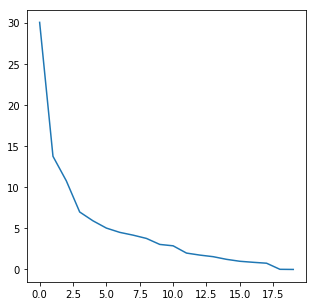

In [290]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)

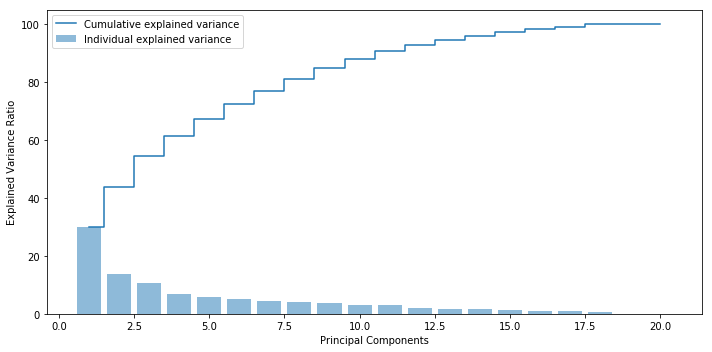

In [291]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [292]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]


[(6.0083883590653535, array([-0.22175415, -0.32102481, -0.36450696, -0.16933753, -0.204113  ,
       -0.04026399, -0.10208238,  0.07413573, -0.34439645, -0.36452029,
       -0.06464835, -0.22357132, -0.00297266,  0.15075977,  0.00579201,
       -0.18653255, -0.33472103, -0.16919704, -0.29969769, -0.18256539])), (2.750804546645037, array([ 0.11852041,  0.17296374,  0.10380281, -0.51378907,  0.20943408,
        0.00356859,  0.04147143, -0.07194686,  0.15132351,  0.08202085,
        0.0630939 ,  0.07499199,  0.01348288,  0.14668214,  0.14768553,
       -0.20079847,  0.04691874, -0.48991696,  0.10557019, -0.50406967])), (2.1536097948646473, array([-0.13366799, -0.02122324, -0.17532317, -0.08491258,  0.24782194,
       -0.19979304, -0.35309237, -0.26633783, -0.04679948,  0.05636046,
       -0.46484128,  0.39271298, -0.18938501, -0.28528238, -0.18647433,
        0.30757283, -0.08253031, -0.07781868, -0.05692421, -0.09159505])), (1.3971850924450782, array([ 0.34448907,  0.07785251,  0.1094975

In [293]:
P_reduce = np.array(eigvectors_sorted[0:17])   # Reducing from 18 to 7 dimension space

inn_4D = np.dot(inn2,P_reduce.T)   # projecting original data into principal component dimensions

inn_data_df = pd.DataFrame(inn_4D)  # converting array to dataframe for pairplot

In [294]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(inn_data_df, y1, test_size=test_size, random_state=seed)

In [295]:
from sklearn.ensemble import GradientBoostingRegressor
dt_gb = GradientBoostingRegressor(n_estimators = 290, learning_rate=0.22)
dt_gb = dt_gb.fit(X_train, y_train)

In [296]:
test_pred2 = dt_gb.predict(X_test)
dt_gb.score(X_test, y_test)

0.8195331831890826

# But from the imaginary PCA we can see that around 17 to 18 variables are needed to get 95% of variance, which when tested with the model, can give a score of 82%

# The elbow curve is not clear, which is normally used to find the clusters in the dataset, which is not needed for this dataset as the target column is continuous

# Iteration 5

In [351]:
inn_df = pd.read_csv("innercity.csv") 

In [352]:
inn_df = inn_df.drop(['cid'], axis=1)

In [353]:
inn_df = inn_df.drop(['dayhours'], axis=1)

In [354]:
#inn_df = inn_df.drop(['room_bed'], axis=1)

In [355]:
#inn_df = inn_df.drop(['room_bath'], axis=1)

In [356]:
#inn_df = inn_df.drop(['living_measure'], axis=1)

In [357]:
inn_df = inn_df.drop(['lot_measure'], axis=1)

In [358]:
#inn_df = inn_df.drop(['ceil'], axis=1)

In [359]:
#inn_df = inn_df.drop(['coast'], axis=1)

In [360]:
#inn_df = inn_df.drop(['sight'], axis=1)

In [361]:
#inn_df = inn_df.drop(['condition'], axis=1)

In [362]:
#inn_df = inn_df.drop(['quality'], axis=1)

In [363]:
#inn_df = inn_df.drop(['ceil_measure'], axis=1)

In [364]:
inn_df = inn_df.drop(['basement'], axis=1)

In [365]:
#inn_df = inn_df.drop(['yr_built'], axis=1)

In [366]:
#inn_df = inn_df.drop(['yr_renovated'], axis=1)

In [367]:
#inn_df = inn_df.drop(['zipcode'], axis=1)

In [368]:
#inn_df = inn_df.drop(['lat'], axis=1)

In [369]:
#inn_df = inn_df.drop(['long'], axis=1)

In [370]:
#inn_df = inn_df.drop(['living_measure15'], axis=1)

In [371]:
#inn_df = inn_df.drop(['lot_measure15'], axis=1)

In [372]:
inn_df = inn_df.drop(['furnished'], axis=1)

In [373]:
#inn_df = inn_df.drop(['total_area'], axis=1)

In [374]:
a = np.mean(inn_df, axis=0)
b = np.std(inn_df, axis=0)
c = (a+(3*b))

In [375]:
inn_new = np.where(inn_df > c, c, inn_df)

In [376]:
inn_new1 = pd.DataFrame(inn_new)

In [377]:
y2 = inn_new1.iloc[:,0]

In [378]:
inn2 = inn_new1.iloc[:,1:]

In [379]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(inn2, y2, test_size=test_size, random_state=seed)

In [380]:
from sklearn.ensemble import GradientBoostingRegressor
dt_gb = GradientBoostingRegressor(n_estimators = 290, learning_rate=0.22)
dt_gb = dt_gb.fit(X_train, y_train)

In [381]:
test_pred2 = dt_gb.predict(X_test)
dt_gb.score(X_test, y_test)

0.899891188041953

> Removing other columns along with the dayhours and id to find out which column helps in improving the model performance

* room_bed - The model score was 89.896% 
* room_bath - The model score was 89.73% 
* living_measure - The model score was 89.744% 
* lot_measure - The model score was 89.869% 
* ceil - The model score was 89.755% 
* coast - The model score was 89.23%
* sight - The model score was 89.47%
* condition - The model score was 89.45%
* quality - The model score was 89.298% 
* ceil_measure - The model score was 89.665% 
* basement - The model score was 89.938% 
* yr_built - The model score was 89.576% 
* yr_renovated - The model score was 89.635% 
* zipcode - The model score was 89.6% 
* lat - The model score was 88.588% 
* long - The model score was 89.30% 
* living_measure15 - The model score was 89.546% 
* lot_measure15 - The model score was 89.839% 
* furnished - The model score was 89.918% 
* total_area - The model score was 89.672% 

# From the results we can clearly see that all the model score decreases if we remove anyone attribute. Let us try and check if any two or more attributes are removed simultaneously apart from cid & dayhours, whether the the model score increases or not

> Removing two and greater than two attributes

* lot_measure & basement - The model score was 89.983% 

* lot_measure, lot_measure15 & basement - The model score was 89.936% 

* lot_measure, furnished & basement - The model score was 89.989% 

# After all the analysis of removing attributes, removal of lot_measure, furnished & basement can yeild the best score of 89.989%. Thus the proposed model can perform with an accuracy of 90% using only 17 attributes out of the 22 attributes from the given dataset, which is what we found from PCA as the minimal no attributes for providing 95% variance.